In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from sklearn.model_selection import train_test_split

<Figure size 720x540 with 0 Axes>

In [2]:
data = pd.read_csv("salary.csv")

In [3]:
data.shape

(8850, 15)

In [4]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2486,19,Private,44047,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
1079,81,Private,184615,7th-8th,4,Widowed,Machine-op-inspct,Unmarried,White,Female,1264,0,40,United-States,<=50K
5899,29,Private,251526,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,20,United-States,<=50K
6133,39,Private,128483,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,<=50K
5137,52,Private,163776,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,60,United-States,>50K


In [5]:
data['income'] = data['income'].replace({'<=50K':0,'>50K':1})

In [6]:
data.isnull().any().sum()

3

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [8]:
# Encoding Categorical Features
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [9]:
data_num=data[numeric_var_names]
data_num.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


In [10]:
my_df = data[cat_var_names]
my_df.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States


In [11]:
len(my_df['education'].value_counts())

16

In [12]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [14]:
my_df.isnull().sum()

workclass         536
education           0
marital-status      0
occupation        537
relationship        0
race                0
gender              0
native-country    143
dtype: int64

In [15]:
my_df['workclass'].mode().iloc[0]

'Private'

In [16]:
my_df['workclass'].value_counts()

Private             6047
Self-emp-not-inc     721
Local-gov            564
State-gov            392
Self-emp-inc         334
Federal-gov          252
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64

In [17]:
for i in my_df[['workclass', 'education', 'marital-status', 'occupation',  'relationship', 'race', 'gender', 'native-country']]:
    my_df[i] = my_df[i].fillna((my_df[i].mode()).iloc[0])


C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [19]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.98))
    x = x.clip_lower(x.quantile(0.02))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
num_summary=data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,8850.0,0.0,3.415390e+05,38.591977,37.0,13.475767,1.815963e+02,18.0,18.0,20.00,22.0,28.00,37.0,48.0,58.0,64.00,70.0,70.0
fnlwgt,8850.0,0.0,1.648332e+09,186252.152339,178007.0,96680.380126,9.347096e+09,30795.6,30795.6,39810.55,63102.6,115590.75,178007.0,237546.0,323829.4,376223.35,446899.0,446899.0
educational-num,8850.0,0.0,8.922600e+04,10.082034,10.0,2.470814,6.104921e+00,4.0,4.0,5.00,7.0,9.00,10.0,12.0,13.0,14.00,15.0,15.0
capital-gain,8850.0,0.0,5.172765e+06,584.493220,0.0,2300.668997,5.293078e+06,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4931.00,13550.0,13550.0
capital-loss,8850.0,0.0,7.372040e+05,83.299887,0.0,379.077537,1.436998e+05,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1902.0,1902.0
hours-per-week,8850.0,0.0,3.567150e+05,40.306780,40.0,11.488693,1.319901e+02,10.0,10.0,18.00,24.9,40.00,40.0,45.0,55.0,60.00,70.0,70.0
income,8850.0,0.0,2.067000e+03,0.233559,0.0,0.423119,1.790296e-01,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1.00,1.0,1.0


In [21]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

num_summary=num_summary.apply(lambda x: Missing_imputation(x))

In [22]:
newdata = pd.concat([my_df,data_num],axis=1)

In [25]:
newdata.shape

(8850, 15)

In [23]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
for c_feature in my_df.columns:
    newdata = create_dummies( newdata, c_feature )

In [24]:
newdata.shape

(8850, 84)

In [25]:
num_list=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']   
hrdf_transform = newdata[num_list].copy()
squared = (hrdf_transform**2).add_suffix("_squared")
square_root = (hrdf_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(hrdf_transform+1).add_suffix("_ln")
hrdf_transform = pd.concat([hrdf_transform, squared, square_root, natural_log], axis=1)
hrdf_transform.drop(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1, inplace=True)
hrdf_transform.head()

,age_squared,fnlwgt_squared,educational-num_squared,capital-gain_squared,capital-loss_squared,hours-per-week_squared,age_sqrt,fnlwgt_sqrt,educational-num_sqrt,capital-gain_sqrt,capital-loss_sqrt,hours-per-week_sqrt,age_ln,fnlwgt_ln,educational-num_ln,capital-gain_ln,capital-loss_ln,hours-per-week_ln
0,625,5.143915e+10,49,0,0,1600,5.000000,476.237336,2.645751,0.000000,0.0,6.324555,3.258097,12.331837,2.079442,0.000000,0.0,3.713572
1,1444,8.066555e+09,81,0,0,2500,6.164414,299.689840,3.000000,0.000000,0.0,7.071068,3.663562,11.405507,2.302585,0.000000,0.0,3.931826
2,784,1.135360e+11,144,0,0,1600,5.291503,580.474806,3.464102,0.000000,0.0,6.324555,3.367296,12.727696,2.564949,0.000000,0.0,3.713572
3,1936,2.570346e+10,100,59105344,0,1600,6.633250,400.403546,3.162278,87.681241,0.0,6.324555,3.806662,11.984952,2.397895,8.947546,0.0,3.713572
4,324,1.071163e+10,100,0,0,900,4.242641,321.709496,3.162278,0.000000,0.0,5.477226,2.944439,11.547308,2.397895,0.000000,0.0,3.433987


In [26]:
newdata2= pd.concat([newdata,hrdf_transform],axis=1)

In [27]:
newdata2.shape

(8850, 102)

In [28]:
y= newdata2['income']

In [29]:
del newdata2['income']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(newdata2, y, test_size = 0.3, stratify=y, random_state = 100) 

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rnd_clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [33]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
y_pred= rnd_clf.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8361581920903954
Precision Score : 0.7107061503416856
Recall Score : 0.5032258064516129
F1 Score : 0.5892351274787535


In [35]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[1908  127]
 [ 308  312]]


In [39]:
rnd_clf.feature_importances_

array([3.70633988e-02, 4.55629960e-02, 3.20881623e-02, 4.25613782e-02,
       8.60385689e-03, 2.08084187e-02, 4.07377502e-03, 0.00000000e+00,
       7.73411379e-03, 4.71440306e-03, 7.23770023e-03, 3.78669537e-03,
       0.00000000e+00, 3.92832991e-03, 1.23675569e-03, 4.34039009e-03,
       7.33851827e-03, 4.71573596e-03, 4.10408382e-02, 2.32702735e-02,
       3.37139497e-03, 4.63897040e-05, 6.06124064e-03, 2.04590525e-02,
       2.57048222e-03, 2.74463714e-03, 4.32977038e-03, 4.30032383e-03,
       1.81247117e-04, 6.66785044e-03, 1.96131217e-03, 5.11194437e-03,
       2.44269264e-03, 4.09002777e-03, 2.15785368e-02, 9.87048319e-04,
       7.38397323e-03, 8.53855256e-03, 1.07584275e-02, 1.90067246e-03,
       2.47551485e-03, 8.46520193e-04, 5.34851732e-03, 1.41520433e-02,
       5.30927631e-04, 2.34812745e-04, 7.69518819e-05, 3.19180895e-04,
       4.66885707e-05, 0.00000000e+00, 3.17168563e-04, 5.90382261e-05,
       6.28062281e-05, 9.72927552e-05, 3.44891607e-04, 6.03166258e-05,
      

In [40]:
for name, importance in zip(newdata2.columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

age = 0.03706339876880284
fnlwgt = 0.0455629959922874
educational-num = 0.03208816229147347
capital-gain = 0.04256137821883154
capital-loss = 0.008603856893727783
hours-per-week = 0.020808418716036284
workclass_Local-gov = 0.004073775017402647
workclass_Never-worked = 0.0
workclass_Private = 0.007734113787527588
workclass_Self-emp-inc = 0.0047144030618545135
workclass_Self-emp-not-inc = 0.007237700229331789
workclass_State-gov = 0.003786695374555176
workclass_Without-pay = 0.0
education_CommunityCollege = 0.003928329908429991
education_Doctorate = 0.0012367556943394839
education_HighGrad = 0.004340390090072649
education_Masters = 0.007338518265786728
education_dropout = 0.004715735958532335
marital-status_NotMarried = 0.04104083818113448
marital-status_Separated = 0.02327027345799466
marital-status_Widowed = 0.003371394968919885
occupation_Armed-Forces = 4.638970401880152e-05
occupation_Craft-repair = 0.006061240636380991
occupation_Exec-managerial = 0.02045905250120563
occupation_Farm

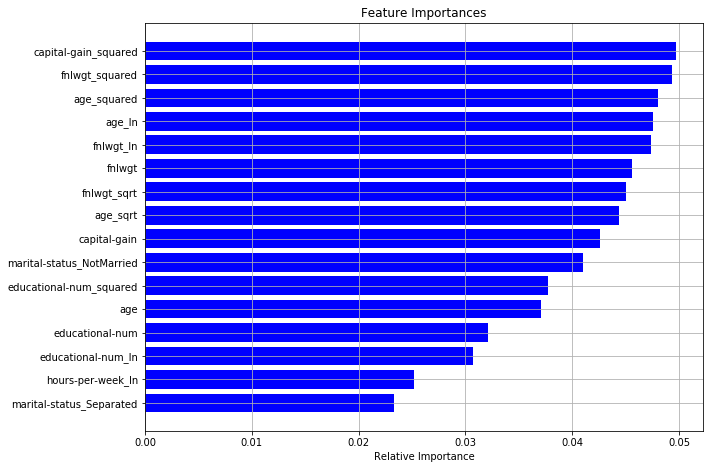

In [41]:
features = newdata2.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[85:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 1)] ## Number of trees in random forest
max_features = ['auto']## Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 20, num = 2)] ## Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2] ## Minimum number of samples required to split a node
min_samples_leaf = [2]## Minimum number of samples required at each leaf node
bootstrap = [True, False] ## Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200], 'max_features': ['auto'], 'max_depth': [5, 20, None], 'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap': [True, False]}


In [44]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,
                               n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [45]:
rf_random.fit(X_train, y_train)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   16.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   16.8s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [46]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [47]:
y_pred= rf_random.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8542372881355932
Precision Score : 0.7754137115839244
Recall Score : 0.5290322580645161
F1 Score : 0.6289549376797698


In [49]:
rnd_clf = RandomForestClassifier(n_estimators = 200,min_samples_split= 2,min_samples_leaf= 2,max_features='auto',max_depth= 20,
 bootstrap= True)

In [50]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rnd_clf.feature_importances_

array([4.22521710e-02, 3.27251021e-02, 3.47746117e-02, 4.05169977e-02,
       1.14002457e-02, 2.56963143e-02, 3.18249523e-03, 0.00000000e+00,
       5.91808825e-03, 3.22998883e-03, 5.28784977e-03, 2.16420236e-03,
       0.00000000e+00, 3.33161259e-03, 1.04332783e-03, 3.31045210e-03,
       7.18133776e-03, 5.18268916e-03, 4.91714475e-02, 2.60482186e-02,
       2.01116212e-03, 0.00000000e+00, 3.09770038e-03, 1.73430976e-02,
       1.58438429e-03, 9.35824485e-04, 2.03639494e-03, 4.87454016e-03,
       4.55654222e-05, 5.08339898e-03, 1.19859351e-03, 3.53498641e-03,
       1.12004181e-03, 1.98952418e-03, 2.93697897e-02, 9.60566239e-04,
       9.79206727e-03, 1.06238913e-02, 1.03729951e-02, 1.21610678e-03,
       2.33140095e-03, 1.13864828e-04, 3.22690007e-03, 1.60820694e-02,
       6.68194616e-05, 6.34047064e-05, 0.00000000e+00, 1.22891157e-04,
       2.98210069e-05, 5.00992178e-06, 4.61090810e-05, 3.75395976e-05,
       0.00000000e+00, 3.36898776e-06, 8.56835732e-05, 6.09849763e-08,
      

In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [18,10],'max_features': [2, 3],
    'min_samples_leaf': [3, 4],'min_samples_split': [8, 10],'n_estimators': [500]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)

In [53]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   34.4s finished


{'bootstrap': True,
 'max_depth': 18,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [54]:
y_pred= grid_search.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8463276836158192
Precision Score : 0.8680555555555556
Recall Score : 0.4032258064516129
F1 Score : 0.5506607929515419


In [ ]:
ss

ADA BOOST AND GRADIENT BOOST

In [36]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8598870056497175
Precision Score : 0.753061224489796
Recall Score : 0.5951612903225807
F1 Score : 0.664864864864865


In [37]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8647834274952919
Precision Score : 0.7986270022883295
Recall Score : 0.5629032258064516
F1 Score : 0.6603595080416274


In [38]:
lr_list = [0.00005,0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,2,5,10]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=50, max_depth=6, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(learning_rate)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

5e-05
Accuracy Score : 0.7664783427495292
Recall Score : 0.0
0.05
Accuracy Score : 0.8595103578154426
Recall Score : 0.5338709677419354
0.075
Accuracy Score : 0.8629001883239171
Recall Score : 0.5564516129032258
0.1
Accuracy Score : 0.8625235404896422
Recall Score : 0.5564516129032258
0.25
Accuracy Score : 0.8595103578154426
Recall Score : 0.5935483870967742
0.5
Accuracy Score : 0.8429378531073446
Recall Score : 0.567741935483871
0.75
Accuracy Score : 0.8369114877589454
Recall Score : 0.5725806451612904
1
Accuracy Score : 0.8354048964218456
Recall Score : 0.6016129032258064
2
Accuracy Score : 0.43653483992467046
Recall Score : 0.6306451612903226
5
Accuracy Score : 0.4726930320150659
Recall Score : 0.5290322580645161
10
Accuracy Score : 0.6775894538606403
Recall Score : 0.3596774193548387


In [41]:
n_es = [40,50,55,60,45]
for i in n_es:
    gb_clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1, max_features=50, max_depth=6, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(i)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

40
Accuracy Score : 0.8308851224105461
Recall Score : 0.5919354838709677
50
Accuracy Score : 0.8354048964218456
Recall Score : 0.6016129032258064
55
Accuracy Score : 0.832015065913371
Recall Score : 0.5967741935483871
60
Accuracy Score : 0.8297551789077213
Recall Score : 0.5838709677419355
45
Accuracy Score : 0.8346516007532957
Recall Score : 0.5951612903225807


In [42]:
n_es = [10,30,50,100,'auto','sqrt']
for i in n_es:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_features=i, max_depth=6, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(i)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

10
Accuracy Score : 0.8229755178907722
Recall Score : 0.5693548387096774
30
Accuracy Score : 0.8286252354048964
Recall Score : 0.5629032258064516
50
Accuracy Score : 0.8354048964218456
Recall Score : 0.6016129032258064
100
Accuracy Score : 0.839924670433145
Recall Score : 0.5758064516129032
auto
Accuracy Score : 0.8335216572504708
Recall Score : 0.5870967741935483
sqrt
Accuracy Score : 0.8229755178907722
Recall Score : 0.5693548387096774


In [45]:
n_es = [5,6,7,8,9,10,15,20,25]
for i in n_es:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_features=50, max_depth=i, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(i)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

9
Accuracy Score : 0.8380414312617702
Recall Score : 0.6048387096774194


In [46]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,2,5]
for learning_rate in lr_list:
    gb_clf = AdaBoostClassifier(n_estimators=50, learning_rate=learning_rate)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(learning_rate)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

0.05
Accuracy Score : 0.8052730696798494
Recall Score : 0.17258064516129032
0.075
Accuracy Score : 0.8128060263653484
Recall Score : 0.2064516129032258
0.1
Accuracy Score : 0.823728813559322
Recall Score : 0.267741935483871
0.25
Accuracy Score : 0.8580037664783428
Recall Score : 0.5225806451612903
0.5
Accuracy Score : 0.8602636534839925
Recall Score : 0.5516129032258065
0.75
Accuracy Score : 0.8583804143126177
Recall Score : 0.5838709677419355
1
Accuracy Score : 0.8598870056497175
Recall Score : 0.5806451612903226
2
Accuracy Score : 0.5551789077212806
Recall Score : 0.9483870967741935
5
Accuracy Score : 0.8033898305084746
Recall Score : 0.18870967741935485


In [47]:
lr_list = [10,50,70,100,200,300]
for i in lr_list:
    gb_clf = AdaBoostClassifier(n_estimators=i, learning_rate=.75)
    gb_clf.fit(X_train, y_train)
    y_pred= gb_clf.predict(X_test)
    print(i)
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))

10
Accuracy Score : 0.8519774011299435
Recall Score : 0.5612903225806452
50
Accuracy Score : 0.8583804143126177
Recall Score : 0.5838709677419355
70
Accuracy Score : 0.8595103578154426
Recall Score : 0.5693548387096774
100
Accuracy Score : 0.8598870056497175
Recall Score : 0.5806451612903226
200
Accuracy Score : 0.8655367231638418
Recall Score : 0.6016129032258064
300
Accuracy Score : 0.863653483992467
Recall Score : 0.5983870967741935


In [ ]:
Best Model till now is Adaboost with n_estimator =200, LR=.75